# Fake News Detection
Streamlined fake news detection system with multiple ML approaches
Optimized for faster execution while maintaining model performance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

real_path = "/content/drive/MyDrive/Colab Notebooks/True.csv"
fake_path = "/content/drive/MyDrive/Colab Notebooks/Fake.csv"

Mounted at /content/drive


In [3]:
rdf = pd.read_csv(real_path)
fdf = pd.read_csv(fake_path)
display(rdf.head())
display(fdf.head())

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [12]:
# don't cut (show a full text)
pd.set_option("display.max_colwidth", None)

# Show 5 random full-text rows
fdf["text"].sample(5, random_state=42)

,text
13474,
11994,"The Senate voted 51-48 this afternoon to proceed to the resolution, S. Con. Res. 3, which would set up a filibuster-proof process, ensuring the chamber s consideration of legislation repealing parts of Obamacare and replacing it, either as one bill or as separate measures.The 54-page document, unveiled yesterday by Budget Chairman Mike Enzi, directs committees of jurisdiction to come up with Affordable Care Act legislation by Jan. 27, meaning a repeal bill could be to Donald Trump s desk by the end February, lawmakers said today.The House Ways and Means and Energy and Commerce as well as the Senate Finance and Health, Education, Labor, and Pensions committees are charged with drafting the legislation.Senate action came as Obama and Pence both headed to the Capitol to meet with their respective parties to discuss efforts to preserve or undo the health-care law. House Ways and Means Chairman Kevin Brady of Texas said that an Obamacare replacement proposal would be laid out on a step-by-step basis and could be fully written by the August recess.The Obama administration immediately hit back with the comment that the Senate vote was passed by a pretty narrow margin Josh Earnest went on to say that the Republicans will be responsible for the ensuing chaos LOL! Via: ZH"
19179,So much for the SCOTUS not being political Check out her comments on equality for women. It s like she s time traveled back to the 50 s. What is the deal with these women that think we re still in the dark ages!
501,"White House counselor Kellyanne Conway crawled out of her crypt after two weeks in hiding to attack Hillary Clinton who is totally not the President. Former reality show star Donald Trump was sworn in 216 days ago (seems longer, huh?) and his administration is still talking about his former rival. It s not too surprising since Trump is still in campaign mode, holding rallies, likely because he still doesn t know how to President.On Thursday, Conway appeared on Fox & Friends to lash out at Trump s critics, the media, and Hillary Clinton for daring to write a book because books are bad, apparently. Where s her big c4 trying to help women and children around the globe? Conway asked as if the Clinton Foundation which helps women and children around the globe does not exist.Conway then just wondered why Clinton is not doing Trump s job. Where s her bipartisan effort to try to help with infrastructure and meaningful tax reform, or the opioid crisis that I work on in the building behind me every single day? Conway asked.Trump s policies and attempted legislation have failed to pass. There s been an exodus of staffers at various councils after his appalling speech on the Charlottesville attack which left one dead and 19 others injured. Thanks, Hillary!Someone, please tell Trump that Hillary Clinton is not holding an elected office. Passing infrastructure bills and handling the opioid crisis is all on Trump. Eradicating Obamacare would have a devastating effect on those suffering from the disease of addiction who wish to get treatment. Thanks again, Hillary.Conway then claimed that Hillary Clinton failed to make history, even though she won the popular vote and was the first woman to become the presidential nominee of a major party in the U.S.Watch: It s way over the line. @KellyannePolls reacts to James Clapper questioning Pres. Trump s fitness for office pic.twitter.com/w4Db17t6g5 FOX & friends (@foxandfriends) August 24, 2017But Trump has tried to claim repeatedly that he won the popular vote (he did not win the popular vote) but thanks for weighing in, Kellyanne. Back to the crypt with you!Image via screen capture."
3492,"Donald Trump may have decided that Russia is going to be America s new BFF, but the rest of the GOP isn t so sure. Going against the incoming administration, several Republicans are preparing to launch a wide-ranging investigation into Russia, particularly their involvement with hacking and alleged interference in th

In [13]:
# don't cut text
pd.set_option("display.max_colwidth", None)

# Show 5 random full-text rows
rdf["text"].sample(5, random_state=42)

18137                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [ ]:
class FakeNewsDetector:
    def __init__(self):
        self.vectorizer = None
        self.model = None
        self.stemmer = PorterStemmer()
        try:
            self.stop_words = set(stopwords.words('english'))
        except:
            nltk.download('stopwords')
            self.stop_words = set(stopwords.words('english'))

    def preprocess_text(self, text):
        """Optimized text preprocessing"""
        # Remove non-alphabetic characters and convert to lowercase
        text = re.sub('[^a-zA-Z]', ' ', text).lower()
        # Tokenize and remove stopwords
        words = [self.stemmer.stem(word) for word in text.split()
                if word not in self.stop_words and len(word) > 2]
        return ' '.join(words)

    def load_and_prepare_data(self, real_path="True.csv", fake_path="Fake.csv", sample_size=None):
        """Load and prepare dataset with optional sampling for faster training"""
        print("Loading datasets...")

        # Load datasets
        real = pd.read_csv(real_path)
        fake = pd.read_csv(fake_path)

        # Add labels
        real['label'] = 1
        fake['label'] = 0

        # Combine datasets
        df = pd.concat([real, fake], ignore_index=True)

        # Sample data if specified (for faster training/testing)
        if sample_size and sample_size < len(df):
            df = df.sample(n=sample_size, random_state=42)
            print(f"Using sample of {sample_size} articles for faster processing")

        # Combine title and text
        df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')

        print(f"Dataset shape: {df.shape}")
        print(f"Real news: {sum(df['label'])}, Fake news: {len(df) - sum(df['label'])}")

        return df

    def train_classical_models(self, X_train, X_test, y_train, y_test):
        """Train and evaluate classical ML models (optimized selection)"""
        print("\n=== Training Classical ML Models ===")

        # Use TF-IDF with optimized parameters
        self.vectorizer = TfidfVectorizer(
            max_features=10000,  # Reduced from unlimited for faster processing
            ngram_range=(1, 2),
            stop_words='english'
        )

        X_train_vec = self.vectorizer.fit_transform(X_train)
        X_test_vec = self.vectorizer.transform(X_test)

        # Select best performing models from original analysis
        models = {
            'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        }

        results = {}

        for name, model in models.items():
            print(f"\nTraining {name}...")
            model.fit(X_train_vec, y_train)
            y_pred = model.predict(X_test_vec)

            accuracy = accuracy_score(y_test, y_pred)
            results[name] = {
                'model': model,
                'accuracy': accuracy,
                'predictions': y_pred
            }

            print(f"{name} Accuracy: {accuracy:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

        return results, X_test_vec

    def train_deep_learning_model(self, X_train, y_train, X_test, y_test):
        """Simplified deep learning approach using TensorFlow/Keras"""
        print("\n=== Training Deep Learning Model ===")

        try:
            import tensorflow as tf
            from tensorflow.keras.models import Sequential
            from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
            from tensorflow.keras.preprocessing.text import Tokenizer
            from tensorflow.keras.preprocessing.sequence import pad_sequences

            # Tokenization with reduced vocabulary for faster training
            tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
            tokenizer.fit_on_texts(X_train)

            # Convert to sequences
            X_train_seq = tokenizer.texts_to_sequences(X_train)
            X_test_seq = tokenizer.texts_to_sequences(X_test)

            # Pad sequences (reduced max length for faster training)
            max_length = 200  # Reduced from 400
            X_train_pad = pad_sequences(X_train_seq, maxlen=max_length, truncating='post')
            X_test_pad = pad_sequences(X_test_seq, maxlen=max_length, truncating='post')

            # Simplified model architecture
            model = Sequential([
                Embedding(5000, 50, input_length=max_length),  # Reduced embedding dimension
                LSTM(50, dropout=0.3, recurrent_dropout=0.3),  # Reduced LSTM units
                Dense(32, activation='relu'),
                Dropout(0.5),
                Dense(1, activation='sigmoid')
            ])

            model.compile(
                optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy']
            )

            print("Model Architecture:")
            model.summary()

            # Train with early stopping
            history = model.fit(
                X_train_pad, y_train,
                batch_size=128,
                epochs=10,  # Reduced epochs
                validation_data=(X_test_pad, y_test),
                verbose=1
            )

            # Evaluate
            y_pred_prob = model.predict(X_test_pad)
            y_pred = (y_pred_prob > 0.5).astype(int).flatten()

            accuracy = accuracy_score(y_test, y_pred)
            print(f"\nLSTM Model Accuracy: {accuracy:.4f}")
            print("Classification Report:")
            print(classification_report(y_test, y_pred))

            return model, tokenizer, accuracy

        except ImportError:
            print("TensorFlow not available. Skipping deep learning model.")
            return None, None, 0

    def save_best_model(self, results, model_path="best_model.pkl", vectorizer_path="vectorizer.pkl"):
        """Save the best performing model"""
        best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
        model_name, model_data = best_model

        # Save model and vectorizer
        with open(model_path, 'wb') as f:
            pickle.dump(model_data['model'], f)

        with open(vectorizer_path, 'wb') as f:
            pickle.dump(self.vectorizer, f)

        print(f"\nBest model ({model_name}) saved with accuracy: {model_data['accuracy']:.4f}")
        return model_name, model_data['accuracy']

    def load_model(self, model_path="best_model.pkl", vectorizer_path="vectorizer.pkl"):
        """Load saved model and vectorizer"""
        try:
            with open(model_path, 'rb') as f:
                self.model = pickle.load(f)

            with open(vectorizer_path, 'rb') as f:
                self.vectorizer = pickle.load(f)

            print("Model and vectorizer loaded successfully!")
            return True
        except FileNotFoundError:
            print("Model files not found. Please train the model first.")
            return False

    def predict(self, text):
        """Make prediction on new text"""
        if self.model is None or self.vectorizer is None:
            raise ValueError("Model not loaded. Please train or load a model first.")

        # Preprocess text
        processed_text = self.preprocess_text(text)

        # Vectorize
        text_vec = self.vectorizer.transform([processed_text])

        # Predict
        prediction = self.model.predict(text_vec)[0]
        confidence = self.model.predict_proba(text_vec)[0].max()

        result = "Real News" if prediction == 1 else "Fake News"
        return result, confidence

    def run_complete_pipeline(self, sample_size=None):
        """Run the complete training pipeline"""
        print("=== Fake News Detection Pipeline ===")

        # Load and prepare data
        df = self.load_and_prepare_data(real_path=real_path, fake_path=fake_path, sample_size=sample_size)

        # Preprocess text
        print("Preprocessing text...")
        df['processed_content'] = df['content'].apply(self.preprocess_text)

        # Split data
        X = df['processed_content']
        y = df['label']
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.3, random_state=42, stratify=y
        )

        # Train classical models
        classical_results, X_test_vec = self.train_classical_models(X_train, X_test, y_train, y_test)

        # Train deep learning model (optional)
        dl_model, tokenizer, dl_accuracy = self.train_deep_learning_model(X_train, y_train, X_test, y_test)

        # Save best classical model
        best_model_name, best_accuracy = self.save_best_model(classical_results)

        # Visualization
        self.plot_results(classical_results, y_test)

        return best_model_name, best_accuracy

    def plot_results(self, results, y_test):
        """Plot model comparison and confusion matrix"""
        plt.figure(figsize=(15, 5))

        # Model comparison
        plt.subplot(1, 2, 1)
        models = list(results.keys())
        accuracies = [results[model]['accuracy'] for model in models]

        plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
        plt.title('Model Accuracy Comparison')
        plt.ylabel('Accuracy')
        plt.xticks(rotation=45)

        # Confusion matrix for best model
        plt.subplot(1, 2, 2)
        best_model = max(results.items(), key=lambda x: x[1]['accuracy'])
        y_pred = best_model[1]['predictions']

        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {best_model[0]}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')

        plt.tight_layout()
        plt.show()


Loading datasets...
Dataset shape: (44898, 6)
Real news: 21417, Fake news: 23481
=== Fake News Detection Pipeline ===
Loading datasets...
Dataset shape: (44898, 6)
Real news: 21417, Fake news: 23481
Preprocessing text...

=== Training Classical ML Models ===

Training Logistic Regression...
Logistic Regression Accuracy: 0.9871
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7045
           1       0.98      0.99      0.99      6425

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470


Training Random Forest...
Random Forest Accuracy: 0.9976
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7045
           1       1.00      1.00      1.00      6425

    accuracy                           1.00     13470
   macro avg       1.0

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 97s 370ms/step - accuracy: 0.7835 - loss: 0.4354 - val_accuracy: 0.9801 - val_loss: 0.0767
Epoch 2/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 139s 361ms/step - accuracy: 0.9616 - loss: 0.1376 - val_accuracy: 0.9739 - val_loss: 0.0900
Epoch 3/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 87s 355ms/step - accuracy: 0.9696 - loss: 0.1072 - val_accuracy: 0.9797 - val_loss: 0.0748
Epoch 4/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 142s 357ms/step - accuracy: 0.9746 - loss: 0.0976 - val_accuracy: 0.9748 - val_loss: 0.0903
Epoch 5/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 144s 366ms/step - accuracy: 0.9450 - loss: 0.1571 - val_accuracy: 0.9687 - val_loss: 0.1063
Epoch 6/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 140s 359ms/step - accuracy: 0.9648 - loss: 0.1121 - val_accuracy: 0.9728 - val_loss: 0.0930
Epoch 7/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 141s 356ms/step - accuracy: 0.9477 - loss: 0.1549 - val_accuracy: 0.9554 - val_loss: 0.1228
Epoch 8/10
246/246 ━━━━━━━━━━━━━━━━━━━━ 145s 366ms/step - accuracy: 0.9459 - l

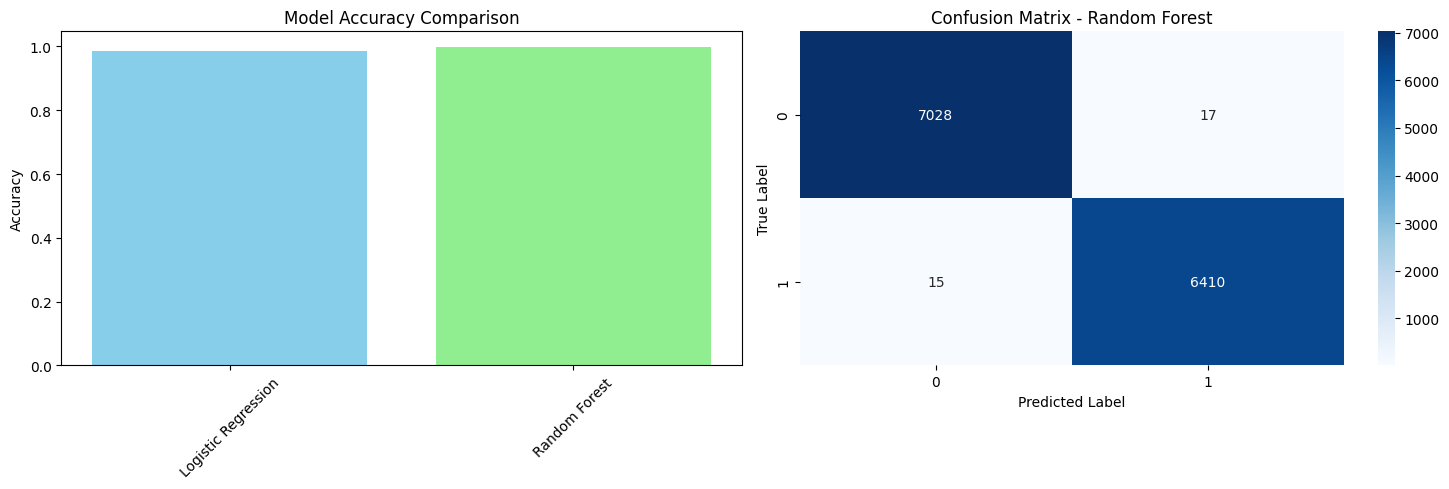

Model and vectorizer loaded successfully!
Fake News 0.98


In [ ]:
detector = FakeNewsDetector()

df = detector.load_and_prepare_data(
    real_path=real_path,
    fake_path=fake_path,
    sample_size=None
)

best_model, accuracy = detector.run_complete_pipeline()

detector.load_model()

sample_text = """Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year!  Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you  Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress.  Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me?  Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish??  Marlene (@marlene399) December 31, 2017You can t just say happy new year?  Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love!  Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his  enemies  and  haters  for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA  Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President?  Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down.  Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters?  Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old  Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images."""
result, confidence = detector.predict(sample_text)
print(result, confidence)
